In [1]:
from pgml import *
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
def draw_graph(model: Model):
    DG = nx.DiGraph()
    world_size = model.worlds_size
    DG.add_nodes_from(list(range(model.worlds_size)))
    DG.add_weighted_edges_from(
        [
            (i, j, model.relation[i][j])
            for i in range(world_size)
            for j in range(world_size)
            if model.relation[i][j] != 0
        ]
    )
    # labels = nx.get_edge_attributes(G, "weights")
    nx.draw(DG)

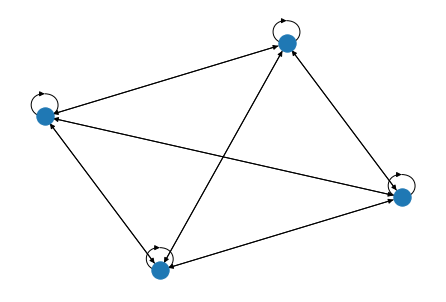

In [3]:
world_size = 4
relation = [[1, 1, 0.5, 0.5], [1, 1, 0.5, 0.5], [0.5, 0.5, 1, 1], [0.5, 0.5, 1, 1]]
valuation1 = {"p": [1, 1, 0.4, 0.4]}
valuation2 = {"p": [0, 0, 0.8, 0.8]}
model = Model(4, relation, valuation1, valuation2)
draw_graph(model)

In [4]:
expression = Diamond(Diamond(Variable("p")))
expression.valuation1(model, 0)

1

## Box can be greater than Diamond

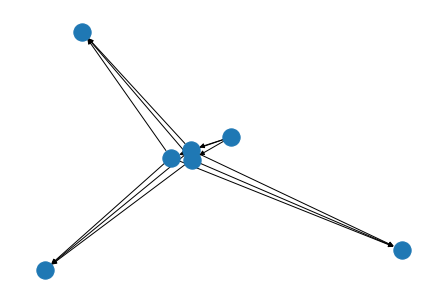

In [32]:
worlds_size = 7
# relation = [[1, 1, 0.5, 0.5], [1, 1, 0.5, 0.5], [0.5, 0.5, 1, 1], [0.5, 0.5, 1, 1]]
# valuation1 = {"p": [1, 1, 0.4, 0.4]}
# valuation2 = {"p": [0, 0, 0.8, 0.8]}
model = Model(worlds_size, self_relation=False)
model.relation[0][1] = 0.3
model.relation[0][2] = 0.5
model.relation[0][3] = 0.7
model.relation[1][4] = 0.3
model.relation[1][5] = 0.5
model.relation[1][6] = 0.7
model.relation[2][4] = 0.3
model.relation[2][5] = 0.5
model.relation[2][6] = 0.7
model.relation[3][4] = 0.3
model.relation[3][5] = 0.5
model.relation[3][6] = 0.7
model.set_variable_valuation1("p", [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
draw_graph(model)

In [33]:
Box(Variable("p")).valuation1(model, 0)

1

In [34]:
Diamond(Variable("p")).valuation1(model, 0)

0.7

In [35]:
Box(Diamond(Variable("p"))).valuation1(model, 0)

1

In [36]:
Diamond(Box(Variable("p"))).valuation1(model, 0)

0.7

In [37]:
Box(Box(Variable("p"))).valuation1(model, 0)

1

In [38]:
Diamond(Diamond(Variable("p"))).valuation1(model, 0)

0.7

## Example 3

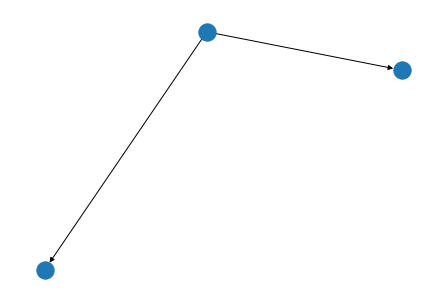

In [39]:
worlds_size = 3
model = Model(worlds_size, self_relation=False)
model.relation[0][1] = 0.4
model.relation[0][2] = 0.6
model.set_variable_valuation1("p", [1, 0.3, 0.5])
draw_graph(model)

In [40]:
Box(Variable("p")).valuation1(model, 0)

0.3

In [41]:
Diamond(Variable("p")).valuation1(model, 0)

0.5

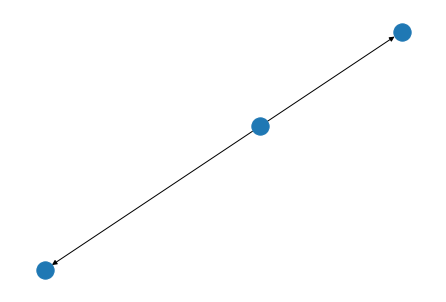

In [42]:
worlds_size = 3
model = Model(worlds_size, self_relation=False)
model.relation[0][1] = 0.7
model.relation[0][2] = 0.3
model.set_variable_valuation1("p", [1, 0.8, 0.2])
draw_graph(model)

In [43]:
Box(Variable("p")).valuation1(model, 0)

0.2

In [44]:
Diamond(Variable("p")).valuation1(model, 0)

0.7